In [6]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [7]:
faces = fetch_olivetti_faces()

faces

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\David\scikit_learn_data


{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], shape=(400, 4096), dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ...

In [8]:
faces.data

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], shape=(400, 4096), dtype=float32)

In [12]:
faces.data[0].shape

(4096,)

In [9]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

mostro un immagine per elemento

In [11]:
np.unique(faces.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

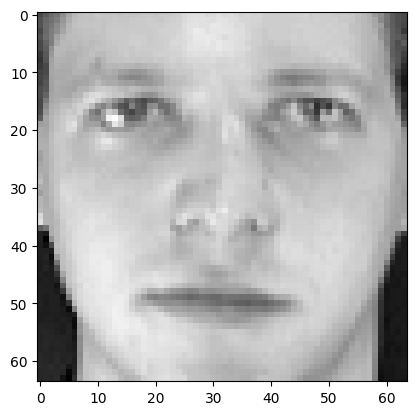

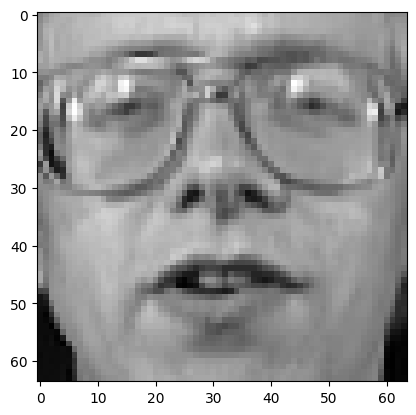

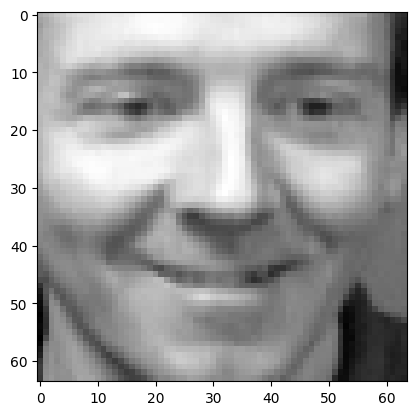

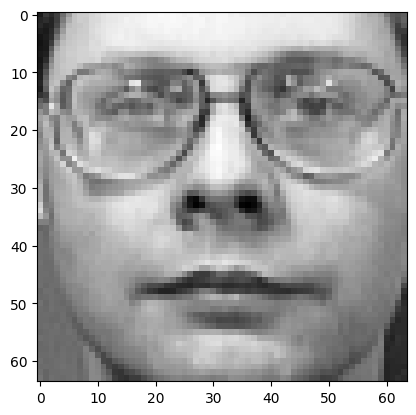

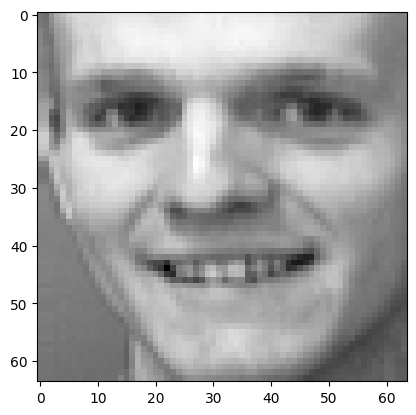

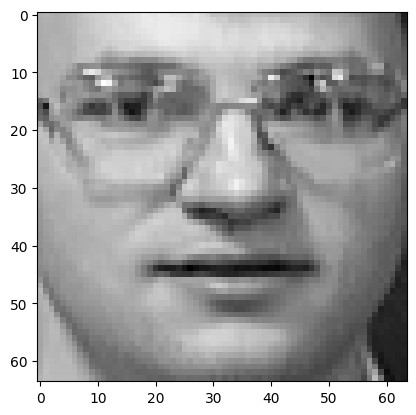

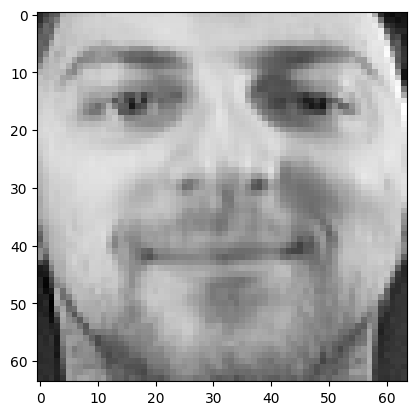

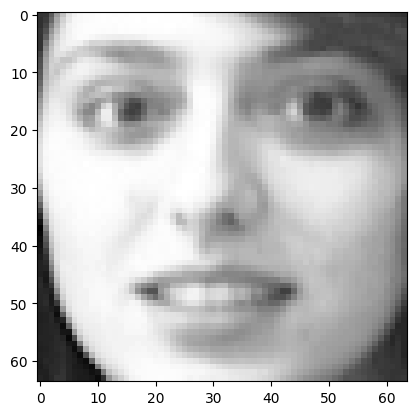

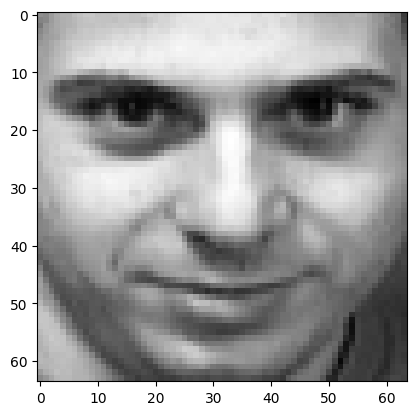

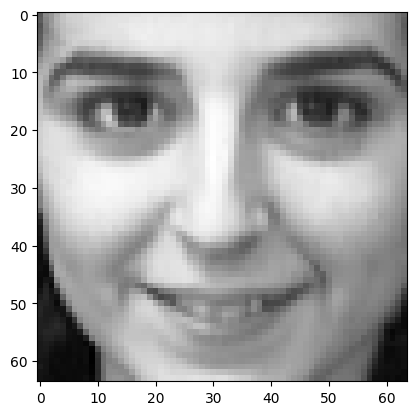

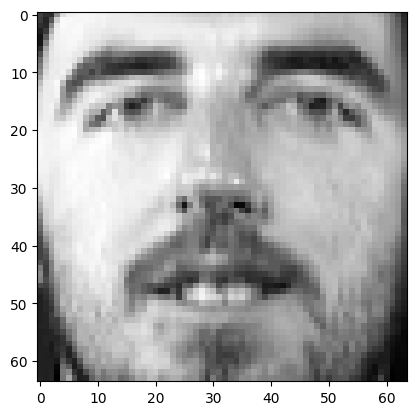

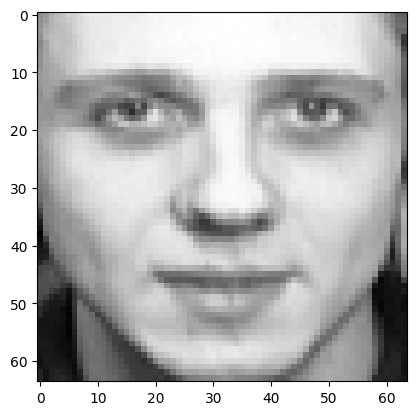

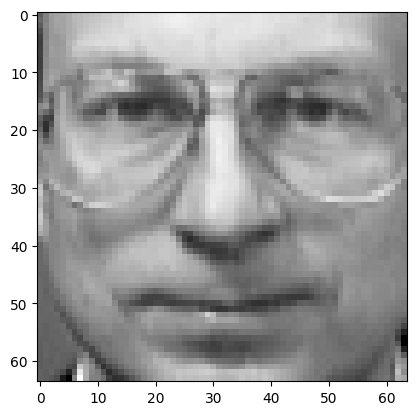

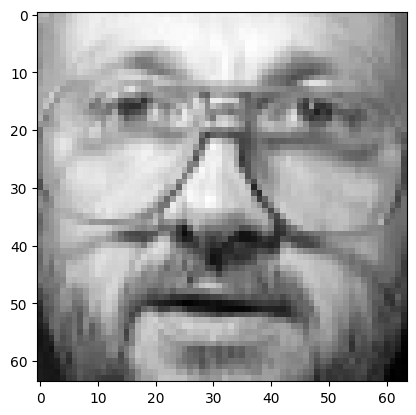

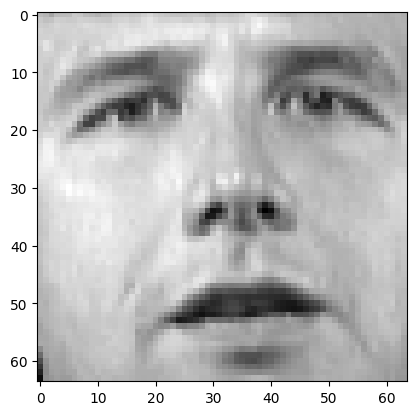

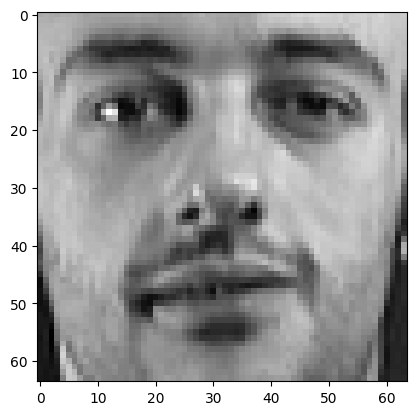

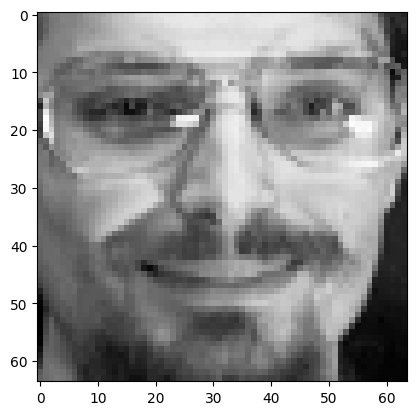

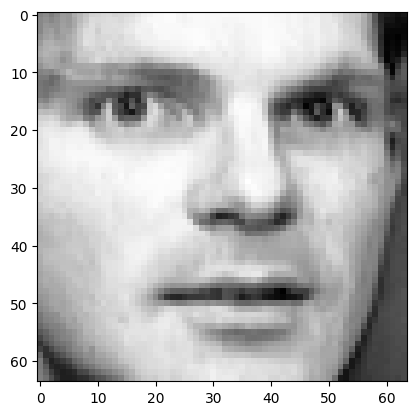

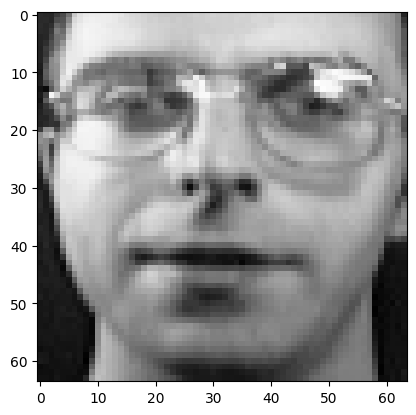

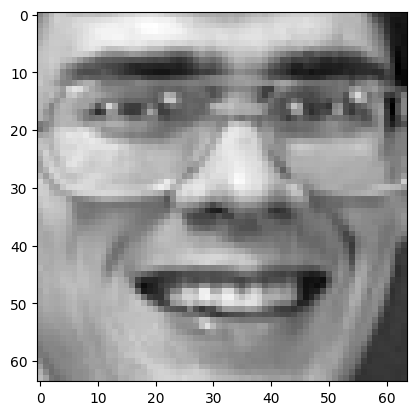

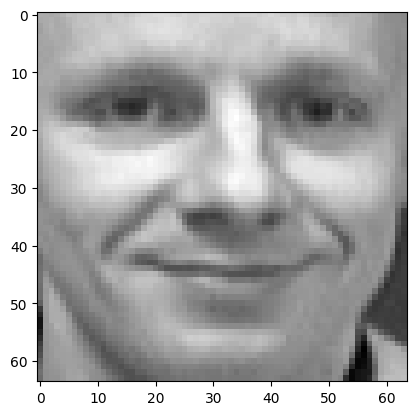

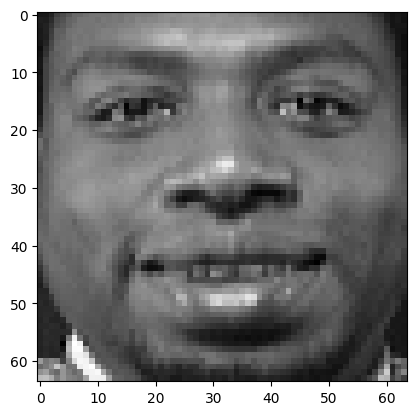

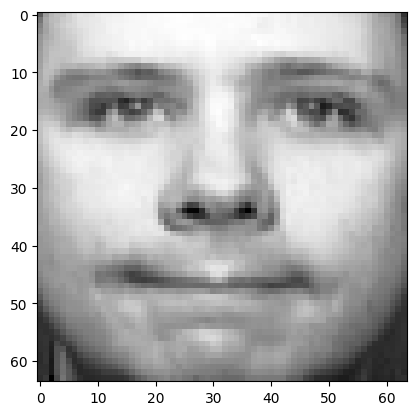

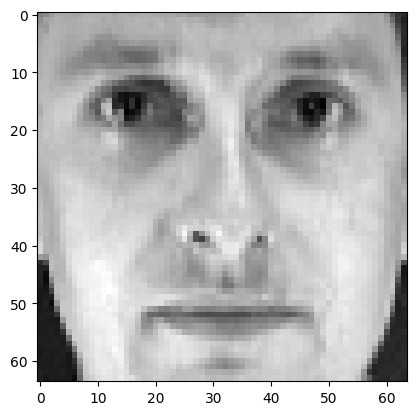

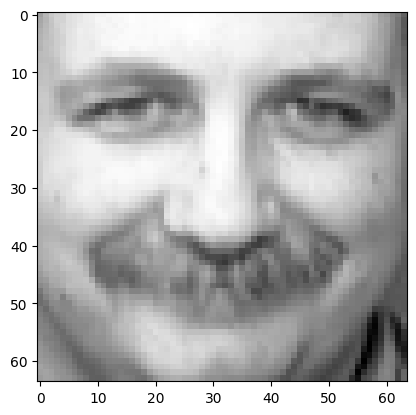

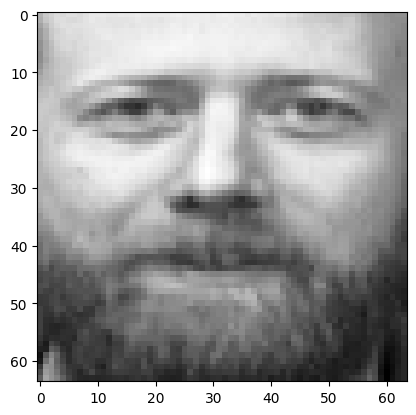

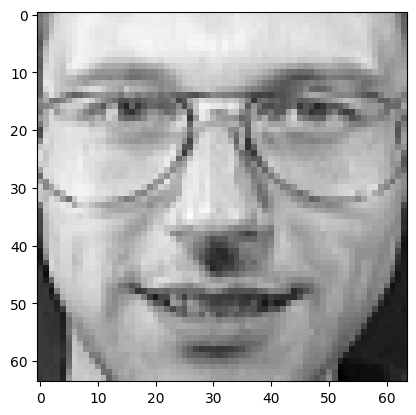

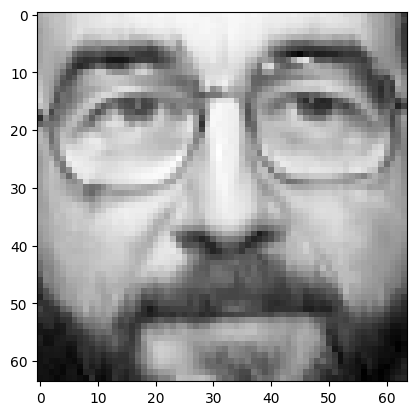

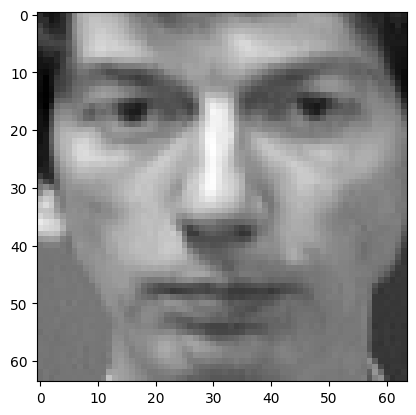

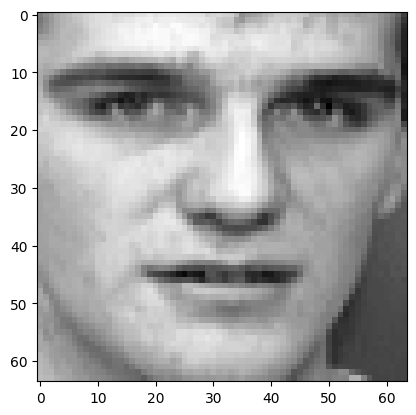

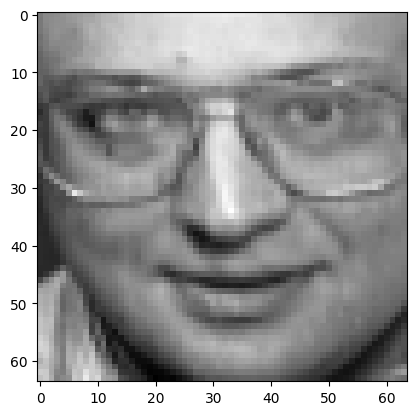

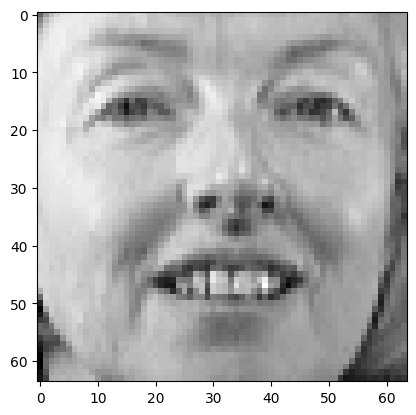

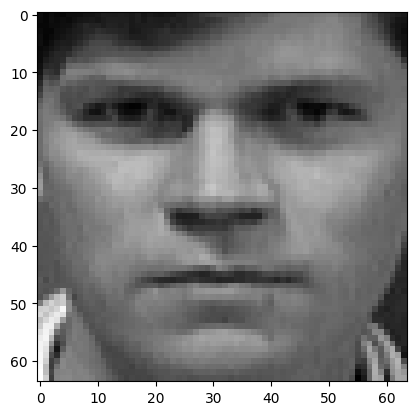

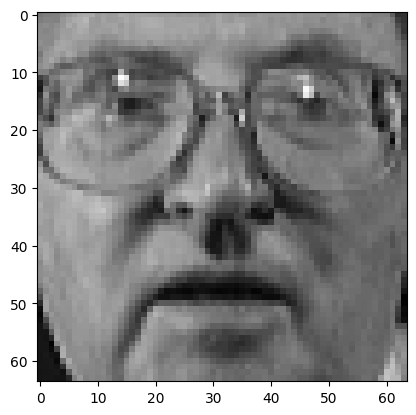

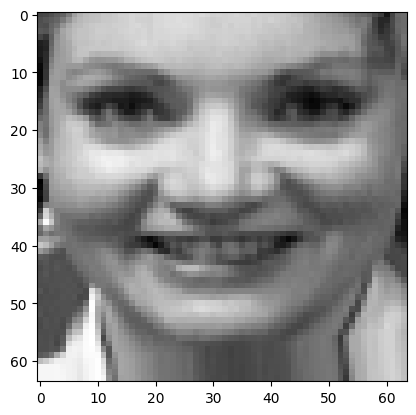

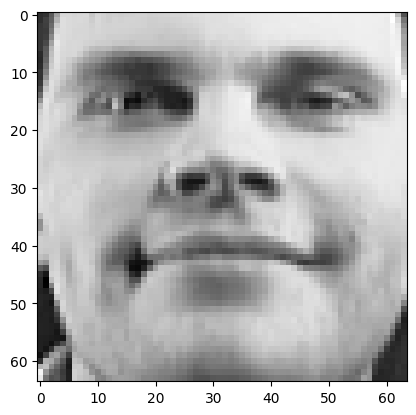

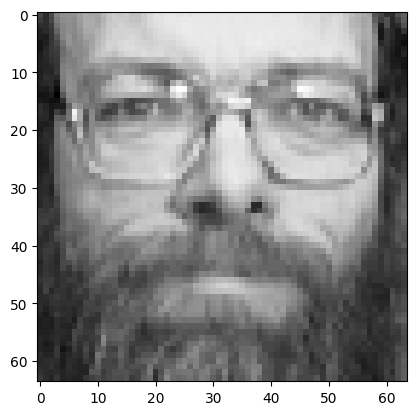

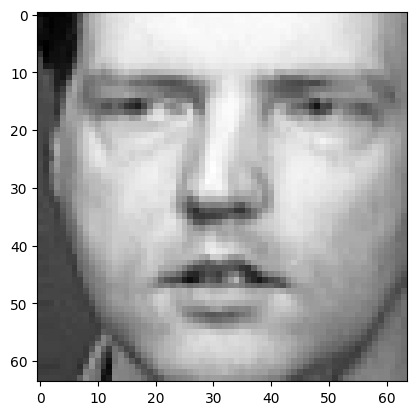

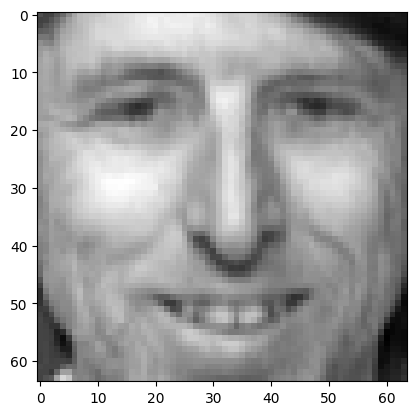

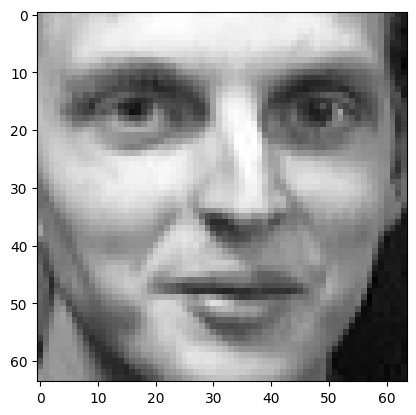

In [17]:
for i in np.unique(faces.target):
  pic_matrix = faces.data[faces.target == i][0].reshape([64,64])
  
  plt.imshow(pic_matrix, cmap="grey")
  plt.show()

In [27]:
data = faces.data
target = faces.target

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (300, 4096), X_test: (100, 4096), y_train: (300,), y_test: (100,)


In [29]:
mms = MinMaxScaler()

mms.fit_transform(X_train)
mms.transform(X_test)

array([[0.15789473, 0.22905028, 0.33333337, ..., 0.        , 0.08040201,
        0.07329844],
       [0.14035085, 0.08379888, 0.03174603, ..., 0.14761904, 0.18090451,
        0.22513092],
       [0.5964912 , 0.72625697, 0.6772487 , ..., 0.31428573, 0.3417085 ,
        0.39267018],
       ...,
       [0.2339181 , 0.2067039 , 0.17460318, ..., 0.10952382, 0.1155779 ,
        0.1937173 ],
       [0.10526315, 0.18435752, 0.22751324, ..., 0.5666666 , 0.5577889 ,
        0.37696338],
       [0.374269  , 0.49720666, 0.5925926 , ..., 0.10952382, 0.18090451,
        0.21989533]], shape=(100, 4096), dtype=float32)

In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
# print(y_pred_proba)
                                
print(f'accuracy {accuracy_score(y_test, y_pred)}')
print(f'log loss: {log_loss(y_test, y_pred_proba, labels=lr.classes_)}')

accuracy 0.95
log loss: 0.3982490661404471


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


In [36]:
print(f'lr.classes: {lr.classes_}')
print(f'test_unique: {np.unique(y_test)}')
print(f'shape: {y_pred_proba.shape}')

lr.classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
test_unique: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
shape: (100, 40)


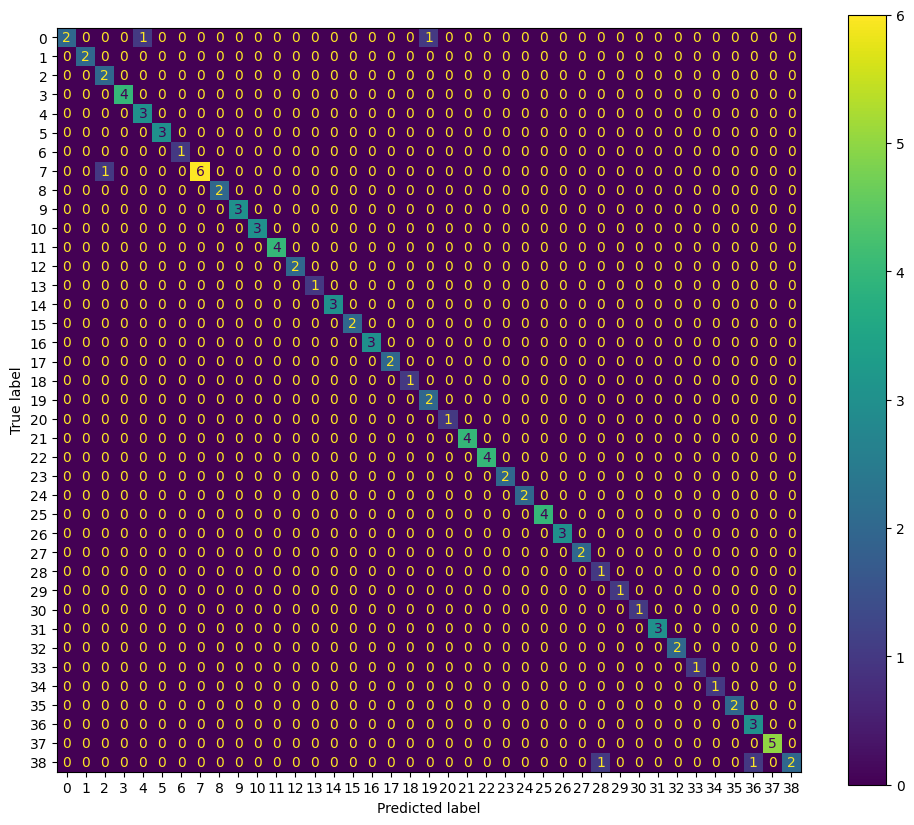

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(ax=ax, values_format='d')

plt.show()

calcolo gli errori

In [52]:
errors = []
for i in range(0,39):
  total = cm[i,:].sum()
  correct = cm[i,i]
  errors.append([i, 100*(total - correct)/total])

errors.sort(key=lambda x: x[1], reverse=True)
errors

[[0, np.float64(50.0)],
 [38, np.float64(50.0)],
 [7, np.float64(14.285714285714286)],
 [1, np.float64(0.0)],
 [2, np.float64(0.0)],
 [3, np.float64(0.0)],
 [4, np.float64(0.0)],
 [5, np.float64(0.0)],
 [6, np.float64(0.0)],
 [8, np.float64(0.0)],
 [9, np.float64(0.0)],
 [10, np.float64(0.0)],
 [11, np.float64(0.0)],
 [12, np.float64(0.0)],
 [13, np.float64(0.0)],
 [14, np.float64(0.0)],
 [15, np.float64(0.0)],
 [16, np.float64(0.0)],
 [17, np.float64(0.0)],
 [18, np.float64(0.0)],
 [19, np.float64(0.0)],
 [20, np.float64(0.0)],
 [21, np.float64(0.0)],
 [22, np.float64(0.0)],
 [23, np.float64(0.0)],
 [24, np.float64(0.0)],
 [25, np.float64(0.0)],
 [26, np.float64(0.0)],
 [27, np.float64(0.0)],
 [28, np.float64(0.0)],
 [29, np.float64(0.0)],
 [30, np.float64(0.0)],
 [31, np.float64(0.0)],
 [32, np.float64(0.0)],
 [33, np.float64(0.0)],
 [34, np.float64(0.0)],
 [35, np.float64(0.0)],
 [36, np.float64(0.0)],
 [37, np.float64(0.0)]]